In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [10]:
#load the data
data = pd.read_csv("C:/Users/amira/Downloads/liverpool_past_performance.csv")
data["Win_Percentage"] = data["Win_Percentage"].str.replace("%", "").astype(float)
data.head(7)
print(data.describe())
print(data.isnull().sum())

       Position     Points  Goal_Difference  Win_Percentage       Wins  \
count  7.000000   7.000000         7.000000        7.000000   7.000000   
mean   2.428571  80.857143        46.000000       70.051429  24.428571   
std    1.397276  15.720778        17.253019       13.667157   5.652644   
min    1.000000  60.000000        26.000000       50.000000  18.000000   
25%    1.500000  68.000000        32.000000       60.530000  19.500000   
50%    2.000000  82.000000        45.000000       72.000000  24.000000   
75%    3.000000  94.500000        59.500000       80.250000  29.000000   
max    5.000000  99.000000        68.000000       86.800000  32.000000   

           Draws    Losses  
count   7.000000  7.000000  
mean    7.571429  4.142857  
std     2.507133  3.484660  
min     3.000000  1.000000  
25%     6.500000  1.500000  
50%     8.000000  3.000000  
75%     9.500000  6.500000  
max    10.000000  9.000000  
Season             0
Position           0
Points             0
Goal_Diff

In [11]:
#Define Features and targets
X = data.drop(["Season", "Position"], axis=1)
y = data["Position"]

print("Features:\n", X.head())
print("Targets:\n", y.head())

Features:
    Points  Goal_Difference  Win_Percentage  Wins  Draws  Losses
0      97               67            84.2    30      7       1
1      99               52            86.8    32      3       3
2      69               26            57.9    20      9       9
3      92               68            76.3    28      8       2
4      67               28            50.0    19     10       9
Targets:
 0    2
1    1
2    3
3    2
4    5
Name: Position, dtype: int64


In [12]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Feastures:\n", X_scaled[:5])

Scaled Feastures:
 [[ 1.10912314  1.3147028   1.11816991  1.06460463 -0.24618298 -0.97417637]
 [ 1.24653663  0.37562937  1.32364944  1.44677039 -1.96946386 -0.35424595]
 [-0.81466567 -1.2520979  -0.96033454 -0.84622419  0.61545745  1.50554531]
 [ 0.76558942  1.37730769  0.49382827  0.68243886  0.18463724 -0.66421116]
 [-0.95207916 -1.12688811 -1.58467618 -1.03730707  1.04627767  1.50554531]]


In [13]:
#Train-test split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (5, 6)
X_test shape: (2, 6)


In [16]:
#train the model
# Initialize the model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring="neg_mean_squared_error")
print(f"Cross-Validation RMSE: {-cv_scores.mean()}")

# Fit the model
model.fit(X_train, y_train)

Cross-Validation RMSE: 2.4715199999999995


RandomForestRegressor(random_state=42)

Test RMSE: 0.7000714249274855
Test R2 Score: -0.9603999999999999


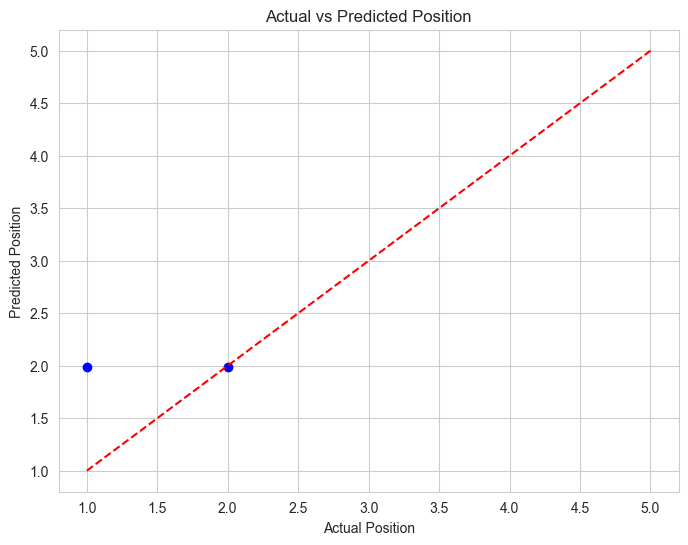

In [23]:
#Evaluate the model
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse}")
print(f"Test R2 Score: {r2}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual vs Predicted Position")
plt.show()

In [25]:
# Save the model and scaler
joblib.dump(model, "models/liverpool_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
print("Model and scaler saved successfully.")

FileNotFoundError: [Errno 2] No such file or directory: 'models/liverpool_model.pkl'